In [14]:
from keras.datasets import imdb

DEFAULT_NUM_WORDS = 10000
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=DEFAULT_NUM_WORDS)

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)
print([reverse_word_index[i] for i in range(1, 20)])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=DEFAULT_NUM_WORDS):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print('x_train.shape: {}'.format(x_train.shape))
print('x_test.shape: {}'.format(x_test.shape))

x_train.shape: (25000, 10000)
x_test.shape: (25000, 10000)


In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('y_train.shape: {}'.format(y_train.shape))
print('y_test.shape: {}'.format(y_test.shape))

y_train.shape: (25000,)
y_test.shape: (25000,)


In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
print('x_val.shape: {}'.format(x_val.shape))
print('partial_x_train.shape: {}'.format(partial_x_train.shape))
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print('y_val.shape: {}'.format(y_val.shape))
print('partial_y_train.shape: {}'.format(partial_y_train.shape))

x_val.shape: (10000, 10000)
partial_x_train.shape: (15000, 10000)
y_val.shape: (10000,)
partial_y_train.shape: (15000,)


In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(DEFAULT_NUM_WORDS,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 167us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 167us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
print('history_dict.keys(): {}'.format(list(history_dict.keys())))

history_dict.keys(): ['val_loss', 'val_acc', 'loss', 'acc']


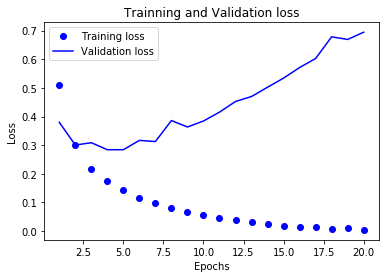

In [22]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Trainning and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

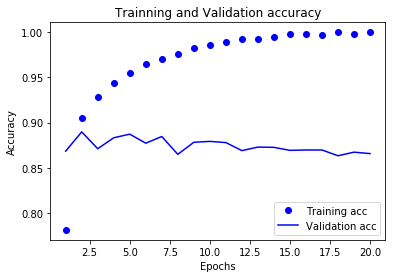

In [23]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Trainning and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
# Retraining until epochs=4 manually to prevent overfitting

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(DEFAULT_NUM_WORDS, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [26]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.2658 - acc: 0.9097 0s - loss: 0.2665 - acc: 0.9
Epoch 3/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.1679 - acc: 0.9404


In [27]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 179us/step


In [28]:
print('results: {}'.format(results))

results: [0.3231440426158905, 0.87348]


In [29]:
from keras import regularizers

model_l2 = models.Sequential()
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(DEFAULT_NUM_WORDS,)))
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_l2.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model_l2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_l2 = model_l2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.7804 - acc: 0.7819 - val_loss: 0.6346 - val_acc: 0.8548
Epoch 2/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.5872 - acc: 0.8724 - val_loss: 0.5753 - val_acc: 0.8588
Epoch 3/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.5265 - acc: 0.8880 - val_loss: 0.5633 - val_acc: 0.8457
Epoch 4/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.4959 - acc: 0.8911 - val_loss: 0.5071 - val_acc: 0.8774
Epoch 5/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.4729 - acc: 0.8937 - val_loss: 0.5010 - val_acc: 0.8694
Epoch 6/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.4522 - acc: 0.8973 - val_loss: 0.5058 - val_acc: 0.8595
Epoch 7/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.4372 - acc: 0.8995 - val_loss: 0.4647 - 

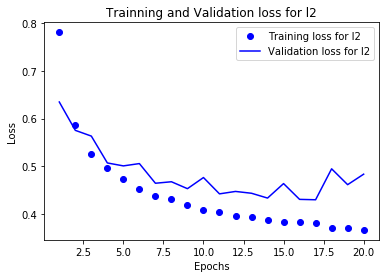

In [31]:
import matplotlib.pyplot as plt

loss_values_l2 = history_l2.history['loss']
val_loss_values_l2 = history_l2.history['val_loss']

epochs = range(1, len(loss_values_l2)+1)

plt.clf()
plt.plot(epochs, loss_values_l2, 'bo', label='Training loss for l2')
plt.plot(epochs, val_loss_values_l2, 'b', label='Validation loss for l2')
plt.title('Trainning and Validation loss for l2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

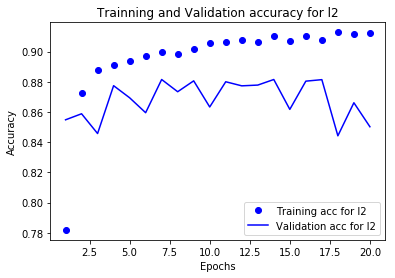

In [32]:
plt.clf()
acc_values_l2 = history_l2.history['acc']
val_acc_values_l2 = history_l2.history['val_acc']

plt.plot(epochs, acc_values_l2, 'bo', label='Training acc for l2')
plt.plot(epochs, val_acc_values_l2, 'b', label='Validation acc for l2')
plt.title('Trainning and Validation accuracy for l2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
model_dropout = models.Sequential()
model_dropout.add(layers.Dense(16, activation='relu', input_shape=(DEFAULT_NUM_WORDS,)))
model_dropout.add(layers.Dropout(0,5))
model_dropout.add(layers.Dense(16, activation='relu'))
model_dropout.add(layers.Dropout(0,5))
model_dropout.add(layers.Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_dropout = model_dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.5349 - acc: 0.7791 - val_loss: 0.4119 - val_acc: 0.8482
Epoch 2/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.3254 - acc: 0.8993 - val_loss: 0.3178 - val_acc: 0.8846
Epoch 3/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.2369 - acc: 0.9243 - val_loss: 0.3399 - val_acc: 0.8585
Epoch 4/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.1841 - acc: 0.9417 - val_loss: 0.2956 - val_acc: 0.8823
Epoch 5/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1529 - acc: 0.9517 - val_loss: 0.2806 - val_acc: 0.8883
Epoch 6/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.1238 - acc: 0.9629 - val_loss: 0.2874 - val_acc: 0.8875
Epoch 7/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1014 - acc: 0.9705 - val_loss: 0.3069 - 

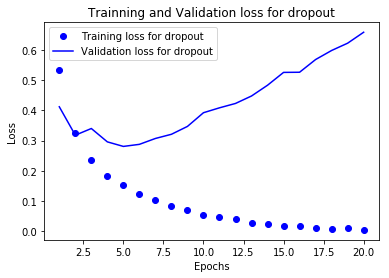

In [38]:
loss_values_dropout = history_dropout.history['loss']
val_loss_values_dropout = history_dropout.history['val_loss']

epochs = range(1, len(loss_values_dropout)+1)

plt.clf()
plt.plot(epochs, loss_values_dropout, 'bo', label='Training loss for dropout')
plt.plot(epochs, val_loss_values_dropout, 'b', label='Validation loss for dropout')
plt.title('Trainning and Validation loss for dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

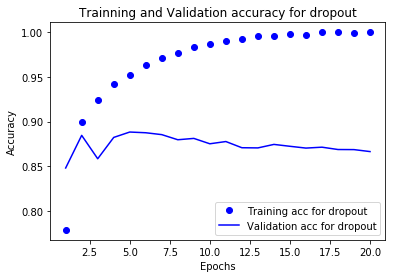

In [39]:
plt.clf()
acc_values_dropout = history_dropout.history['acc']
val_acc_values_dropout = history_dropout.history['val_acc']

plt.plot(epochs, acc_values_dropout, 'bo', label='Training acc for dropout')
plt.plot(epochs, val_acc_values_dropout, 'b', label='Validation acc for dropout')
plt.title('Trainning and Validation accuracy for dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

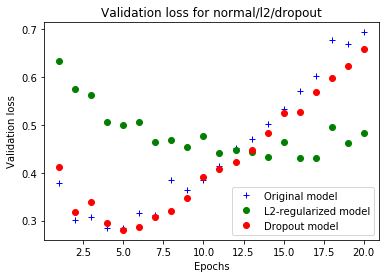

In [40]:
plt.clf()
plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.plot(epochs, val_loss_values_l2, 'go', label='L2-regularized model')
plt.plot(epochs, val_loss_values_dropout, 'ro', label='Dropout model')
plt.title('Validation loss for normal/l2/dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [41]:
import string

def remove_punctuation(review):
    result = review.translate(str.maketrans('', '', string.punctuation))
    #result = review.translate(str.maketrans({key: None for key in string.punctuation}))
    print("remove_punctuation: {}".format(result))
    return result
    
def encode_review(review):
    result =  [ word_index.get(word) if word_index.get(word) and word_index.get(word) < 10000 else 0 for word in review.split(' ')]
    print("encode_review: {}".format(result))
    return result

def predict_review(review, model):
    review_sequences = [encode_review(remove_punctuation(review))]
    assert len(review_sequences) == 1
    
    x = vectorize_sequences(review_sequences)
    y = model.predict(x)
    
    print('y:{}'.format(y))
    positive = y[0, 0]
    if positive >= 0.8:
        print('The review is positive with probability: {} :)'.format(positive))
    elif positive < 0.2:
        print('The review is negative with probability: {} :('.format(1-positive))
    else:
        print('Not so sure, we predict the review is positive with probability: {}'.format(positive))

In [35]:
test_review1 = "Solid Movie for Those Who PayAttention"
predict_review(test_review1, model)

test_review2 = "Unexpected; a movie that will push to deep thinking"
predict_review(test_review2, model)

test_review3 = "Such a confusing, frustrating movie!"
predict_review(test_review3, model)

remove_punctuation: Solid Movie for Those Who PayAttention
encode_review: [0, 0, 15, 0, 0, 0]
y:[[0.46253332]]
Not so sure, we predict the review is positive with probability: 0.4625333249568939
remove_punctuation: Unexpected a movie that will push to deep thinking
encode_review: [0, 3, 17, 12, 77, 3652, 5, 930, 533]
y:[[0.4287774]]
Not so sure, we predict the review is positive with probability: 0.42877739667892456
remove_punctuation: Such a confusing frustrating movie
encode_review: [0, 3, 1496, 5126, 17]
y:[[0.45486817]]
Not so sure, we predict the review is positive with probability: 0.4548681676387787


In [36]:
predict_review(test_review1, model_l2)

predict_review(test_review2, model_l2)

predict_review(test_review3, model_l2)

remove_punctuation: Solid Movie for Those Who PayAttention
encode_review: [0, 0, 15, 0, 0, 0]
y:[[0.57464075]]
Not so sure, we predict the review is positive with probability: 0.5746407508850098
remove_punctuation: Unexpected a movie that will push to deep thinking
encode_review: [0, 3, 17, 12, 77, 3652, 5, 930, 533]
y:[[0.5974238]]
Not so sure, we predict the review is positive with probability: 0.597423791885376
remove_punctuation: Such a confusing frustrating movie
encode_review: [0, 3, 1496, 5126, 17]
y:[[0.57103413]]
Not so sure, we predict the review is positive with probability: 0.5710341334342957


In [42]:
predict_review(test_review1, model_dropout)

predict_review(test_review2, model_dropout)

predict_review(test_review3, model_dropout)

remove_punctuation: Solid Movie for Those Who PayAttention
encode_review: [0, 0, 15, 0, 0, 0]
y:[[0.4805903]]
Not so sure, we predict the review is positive with probability: 0.4805903136730194
remove_punctuation: Unexpected a movie that will push to deep thinking
encode_review: [0, 3, 17, 12, 77, 3652, 5, 930, 533]
y:[[0.74323565]]
Not so sure, we predict the review is positive with probability: 0.7432356476783752
remove_punctuation: Such a confusing frustrating movie
encode_review: [0, 3, 1496, 5126, 17]
y:[[0.34971273]]
Not so sure, we predict the review is positive with probability: 0.3497127294540405


In [43]:
test_review_by_qiuqiu = 'the story of the movie is good,but i do not like it.'
predict_review(test_review_by_qiuqiu, model_dropout)

remove_punctuation: the story of the movie is goodbut i do not like it
encode_review: [1, 62, 4, 1, 17, 6, 0, 10, 78, 21, 37, 9]
y:[[0.1969676]]
The review is negative with probability: 0.803032398223877 :(


In [44]:
test_review_by_qiuqiu_2 = 'the story of the movie is terrible,but i like it.'
predict_review(test_review_by_qiuqiu_2, model_dropout)

remove_punctuation: the story of the movie is terriblebut i like it
encode_review: [1, 62, 4, 1, 17, 6, 0, 10, 37, 9]
y:[[0.5189517]]
Not so sure, we predict the review is positive with probability: 0.5189517140388489


In [45]:
test_review_by_qiuqiu_3 = "The content of this movie is very rich. And the storyline is very exciting."
predict_review(test_review_by_qiuqiu_3, model_dropout)

remove_punctuation: The content of this movie is very rich And the storyline is very exciting
encode_review: [0, 1497, 4, 11, 17, 6, 52, 1023, 0, 1, 766, 6, 52, 1124]
y:[[0.9797347]]
The review is positive with probability: 0.9797347187995911 :)


In [46]:
test_review_by_qiuqiu_4 = 'The movie makes me asleep.'
predict_review(test_review_by_qiuqiu_4, model_dropout)

remove_punctuation: The movie makes me asleep
encode_review: [0, 17, 163, 69, 2356]
y:[[0.61541396]]
Not so sure, we predict the review is positive with probability: 0.6154139637947083
